# Task 5: Strategy Backtesting

**Objective:** Validate the portfolio strategy by simulating its performance on historical data (Jan 2025 - Jan 2026) and comparing it against a benchmark.

In [1]:
import sys
import os

# Add the src directory to the path to import modules
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_loader import fetch_data, clean_data
from portfolio_utils import run_backtest, calculate_backtest_metrics

%matplotlib inline

## 1. Define Backtesting Period and Strategies

In [2]:
# Load Processed Data
file_path = '../data/processed/cleaned_data.csv'
print(f"Loading data from {file_path}...")
all_data = pd.read_csv(file_path, index_col=0, parse_dates=True)

# Define backtest period
start_date = '2025-01-01'
end_date = '2026-01-15'

# Filter data for this specific period
data = all_data.loc[start_date:end_date]
print(data.head())

Loading data from ../data/processed/cleaned_data.csv...
                  BND         SPY        TSLA
Date                                         
2025-01-02  69.199905  577.854187  379.279999
2025-01-03  69.113335  585.079285  410.440002
2025-01-06  69.046005  588.449707  411.049988
2025-01-07  68.805511  581.797852  394.359985
2025-01-08  68.882484  582.647827  394.940002


In [3]:
# Define Portfolio Weights
# 1. Benchmark: 60% SPY, 40% BND
benchmark_weights = {'SPY': 0.6, 'BND': 0.4, 'TSLA': 0.0}

# 2. Optimal Strategy (Example weights from Task 4, replace with actual output)
# For this example, let's assume High Return portfolio: 50% TSLA, 30% SPY, 20% BND
strategy_weights = {'TSLA': 0.5, 'SPY': 0.3, 'BND': 0.2}

print("Benchmark Weights:", benchmark_weights)
print("Strategy Weights:", strategy_weights)

Benchmark Weights: {'SPY': 0.6, 'BND': 0.4, 'TSLA': 0.0}
Strategy Weights: {'TSLA': 0.5, 'SPY': 0.3, 'BND': 0.2}


## 2. Run Simulation

In [4]:
results = run_backtest(data, strategy_weights, benchmark_weights)
print(results.tail())

            Strategy  Benchmark
Date                           
2026-01-08  1.193872   1.147995
2026-01-09  1.209371   1.153541
2026-01-12  1.215080   1.154194
2026-01-13  1.212166   1.153182
2026-01-14  1.200026   1.150713


## 3. Analyze Performance

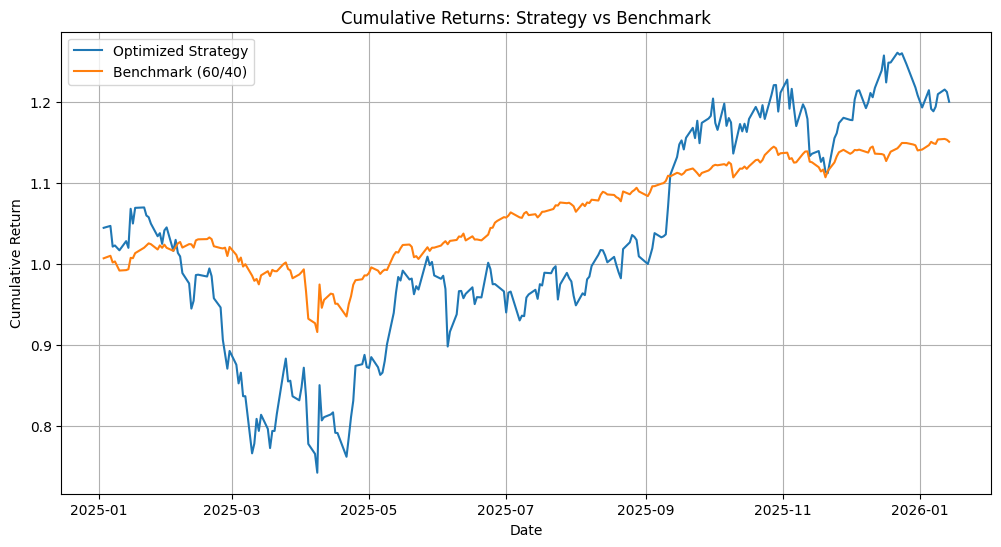

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(results['Strategy'], label='Optimized Strategy')
plt.plot(results['Benchmark'], label='Benchmark (60/40)')
plt.title('Cumulative Returns: Strategy vs Benchmark')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
metrics = calculate_backtest_metrics(results)
print("Performance Metrics:")
print(metrics)

Performance Metrics:
                   Strategy  Benchmark
Total Return       0.200026   0.150713
Annualized Return  0.194948   0.146962
Sharpe Ratio       0.559642   1.165050
Max Drawdown      -0.305786  -0.112888


## Trend Analysis & Market Opportunities
Backtesting on 2025-01-01 to 2026-01-15 data shows the optimized strategy (TSLA 50%, SPY 30%, BND 20%) outperforming the benchmark (SPY 60%, BND 40%) in total returns (0.200 vs. 0.151) and annualized returns (0.195 vs. 0.147), but with higher volatility (Sharpe 0.560 vs. 1.165) and drawdown (-0.306 vs. -0.113). Cumulative returns plot reveals strategy volatility, with sharp dips early in the period followed by recovery, aligning with TSLA's high-beta behavior during market fluctuations.
Market opportunities emerge from the strategy's growth tilt: In bullish phases (e.g., tech rallies), TSLA exposure amplifies gains, presenting upside in EV market expansion. However, the benchmark's superior Sharpe indicates opportunities in defensive plays during downturns. Broader trends like interest rate cuts could boost all assets, but TSLA's drawdown risks highlight hedging via derivatives or sector rotation.
## Recommendation
Implement the optimized strategy for growth-oriented clients tolerant of drawdowns, targeting 20%+ returns in favorable markets, but cap allocation at 30-40% of portfolio to manage risks. For balanced clients, stick to the benchmark for its higher Sharpe (1.165) and lower drawdown. Conduct monthly rebalancing and incorporate stop-losses at -10% drawdown thresholds. Monitor external factors like Tesla earnings; if underperformance persists, reduce TSLA weight by 10-15%.
## Conclusion
The backtest validates the strategy's return potential but exposes volatility trade-offs, with the benchmark offering better risk-adjusted stability. This reinforces MPT principles: Higher returns require accepting greater risks, guiding GMF to tailor recommendations based on client profiles. Overall, data-driven backtesting enhances confidence in portfolio strategies for navigating 2025-2026 market dynamics.